# Sample Solutions for Exercise 2

### Problem 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
dt = 0.001
n_cycle = 50    #save data on each 50 time steps
n_total = 4001  #total number of data in order to compute until t = 200
z0 = np.array([-0.587, -0.563, 16.870])

In [3]:
#generating noise with tent map
a = dt**(-1/2)
def tmap(g):
    if (g>=-a/2) & (g<0):
        g = 1.99999*g + a/2
    elif (g>=0) & (g<=a/2):
        g = -1.99999*g + a/2
    else:
        #make sure it does not blow up
        print('out of range')

    return g

In [4]:
#Simulate Lorenz63 system

z = np.copy(z0)     #running value
g1, g2, g3 = a*(2**(-1/2)-1/2),a*(3**(-1/2)-1/2),a*(5**(-1/2)-1/2)
z_out = np.zeros((n_total,3))
for i in range(n_total):
    z_out[i] = z
    for j in range(n_cycle):
        g1, g2, g3 = tmap(g1), tmap(g2), tmap(g3)
        z += np.array([10*(z[1]-z[0]) + g1,z[0]*(28-z[2])-z[1] +g2, z[0]*z[1]-8*z[2]/3 +g3])*dt

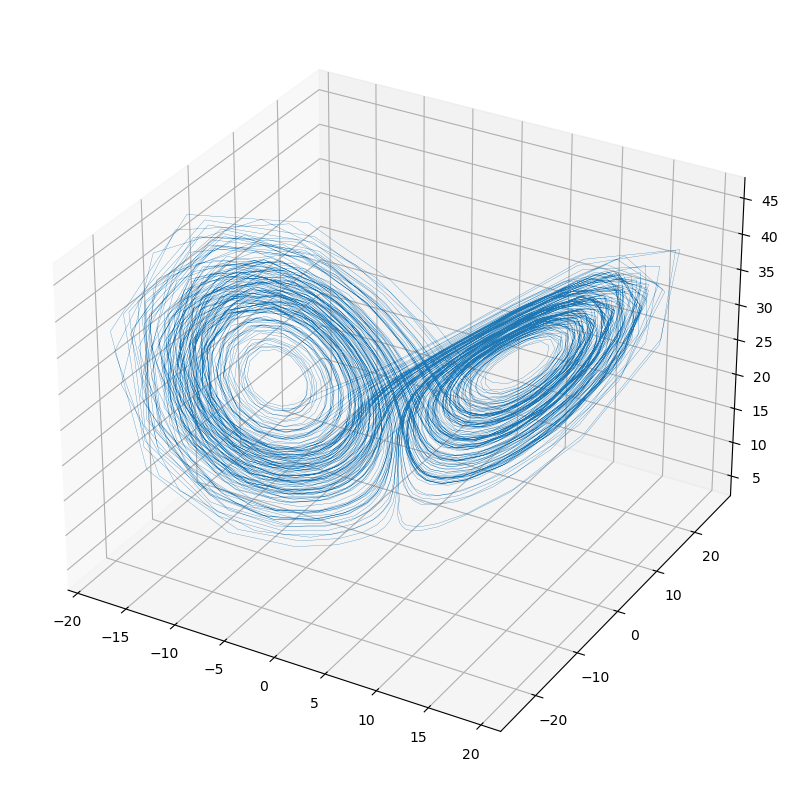

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_out[:,0],z_out[:,1],z_out[:,2],lw=0.2)

### Problem 2

In [6]:
#tent maps
a = 4
def tmap2(g):
    if (g>=-a/2) & (g<0):
        g = 1.99999*g + a/2
    elif (g>=0) & (g<=a/2):
        g = -1.99999*g + a/2
    else:
        print('out of range')

    return g

def tmap3(g):
    #without prevention of degenerating float
    if (g>=-a/2) & (g<0):
        g = 2*g + a/2
    elif (g>=0) & (g<=a/2):
        g = -2*g + a/2
    else:
        print('out of range')

    return g

In [23]:
##generate measurement noise sequence
#Disclaimer: in online setting, you would generate the measurement noise for each time step.
#This code is a toy simulation and it is not practical.
e_t = np.zeros(n_total)
e_t_2 = np.zeros(n_total)

e = a*(2**(-1/2)-1/2)
e_2 = a*(2**(-1/2)-1/2)

for i in range(n_total):
    for j in range(20):
        e_t[i] += e/20
        e_t_2[i] += e_2/20
        for k in range(10):
            e = tmap2(e)
            e_2 = tmap3(e_2)    

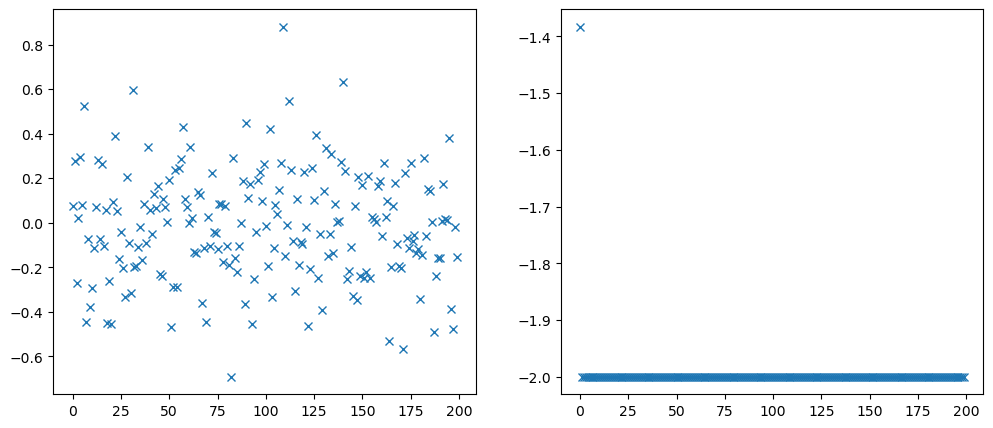

In [8]:
##Comparison between noise generated by the two maps
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(e_t[:200],'x')
ax2.plot(e_t_2[:200],'x')

In [9]:
y_out = z_out[:,0]+e_t
t = (np.cumsum(np.ones(n_total))-1)*dt*n_cycle

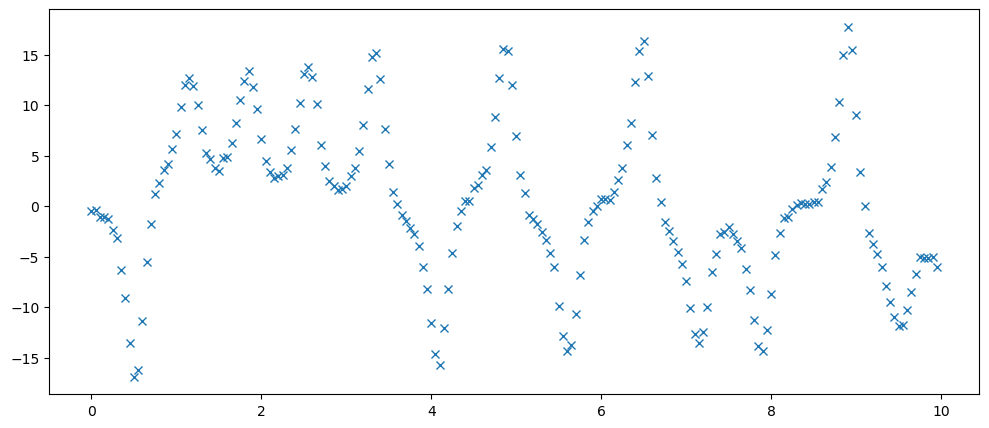

In [10]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.plot(t[:200],y_out[:200],'x')

### Problem 3

In [19]:
#Generate one-step prediction from datapoints
#In general, especially on-line algorithms would never compute the estimation like this.
#The purpose of this code might be a quick test of the theoretical formula.

q1 = y_out[2000:4000]*2-y_out[1999:3999]
rmse1 = np.sqrt(np.mean((q1-y_out[2001:4001])**2))
print("The RMSE with one-step prediction formula is {:6.4f}".format(rmse1))

The RMSE with one-step prediction formula is 1.3318


In [20]:
#Generate linear two-step prediction from datapoints
q2 = y_out[2000:3999]*3-y_out[1999:3998]*2
rmse2 = np.sqrt(np.mean((q2-y_out[2002:4001])**2))
print("The RMSE with one-step prediction formula is {:6.4f}".format(rmse2))

The RMSE with one-step prediction formula is 3.4244


#### The error value increase as we try to predict further using linear prediction scheme.

#### During the tutorial session, I raised a question on if measurement error plays a role here. Let us check that.

In [22]:
print("The contribution of measurement noise shall be {:6.4f}".format(np.sqrt(np.mean(e_t[2001:4001]**2))))

The contribution of measurement noise shall be 0.2527
